In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
from matplotlib import pyplot as plt

In [8]:
tickers=["XWD.TO","^GSPC","^IXIC","^FTSE","^GDAXI","FXI","FTSEMIB.MI","BTC-USD"]
name=["MSCIWorld","SeP","Nasdaq","Londra","Germania","Cina","Italia","Bitcoin"]
quale=0
anni=10
print(name[quale])

MSCIWorld


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'MSCIWorld'}, xlabel='Date'>

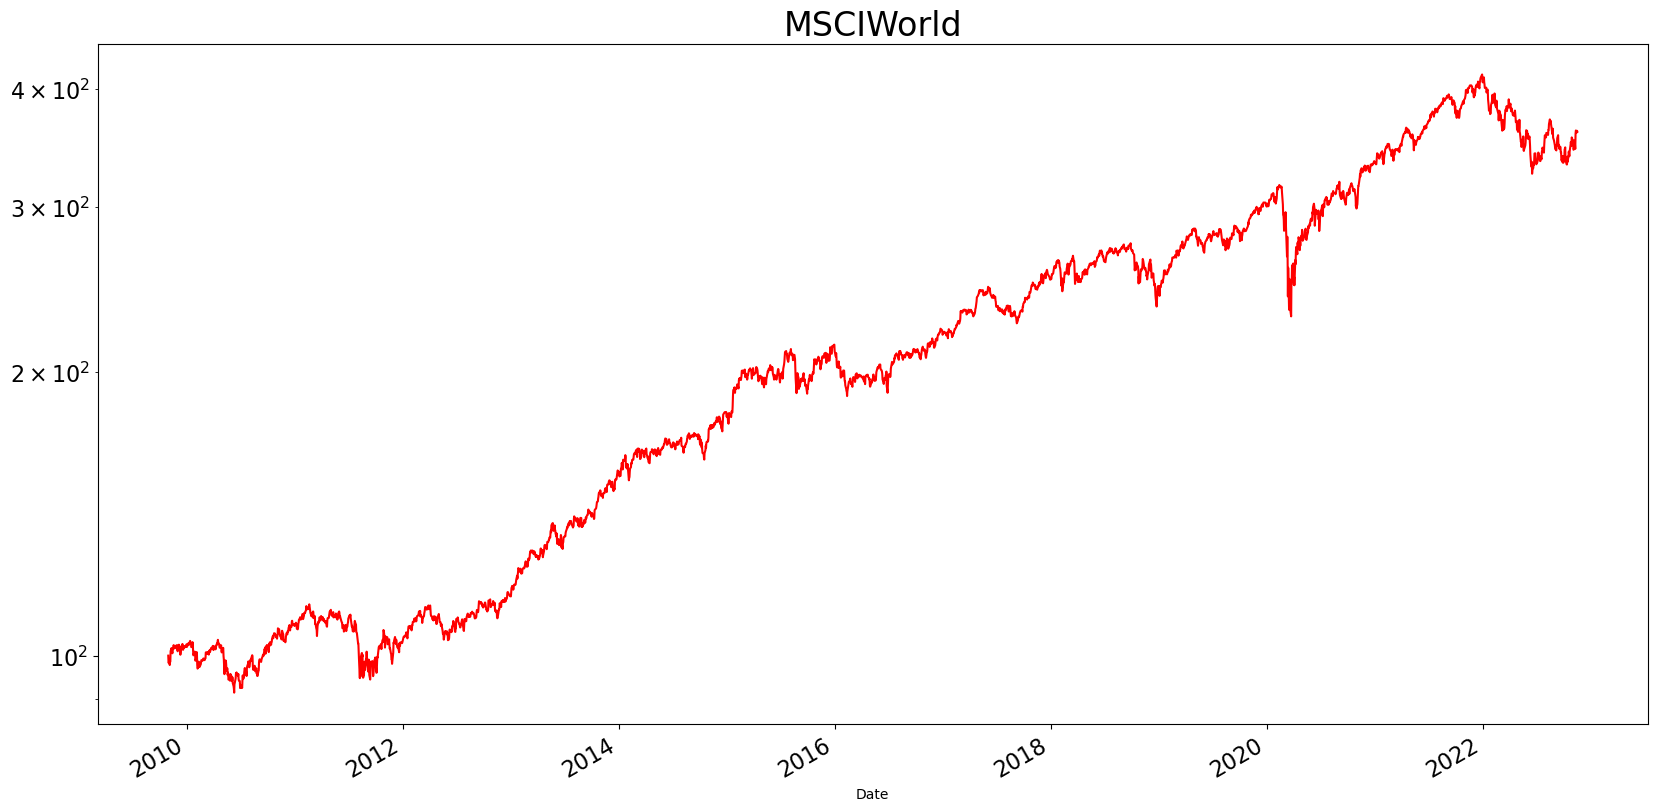

In [9]:
df = yf.download(tickers[quale],start="1970-1-2")["Adj Close"].to_frame()
df.dropna(inplace=True)
df.rename(columns = {'Adj Close':"prezzo"}, inplace = True)
giorniPerAnno=365*len(df.prezzo)/((df.index[-1]-df.index[0]).days+1)
quanto=int(anni*giorniPerAnno)
df["prima"]=df.prezzo.shift(quanto)
df["variaz"]=df.prezzo-df.prima
plt.title(name[quale], fontdict = {'fontsize' : 24})
(100*df.prezzo/df.prezzo.iloc[0]).plot(figsize=(20,10),logy=True, fontsize=16,color="red")

Rendimento MSCIWorld annuo degli ultimi 10 anni 12.5 %
Rendimento MSCIWorld annuo su 10 anni: Min: 8.5 %, Medio: 12.4 %, Mediano: 12.2 %, Max: 15.4 %



Text(0.5, 0, 'Rendimento in 10 anni')

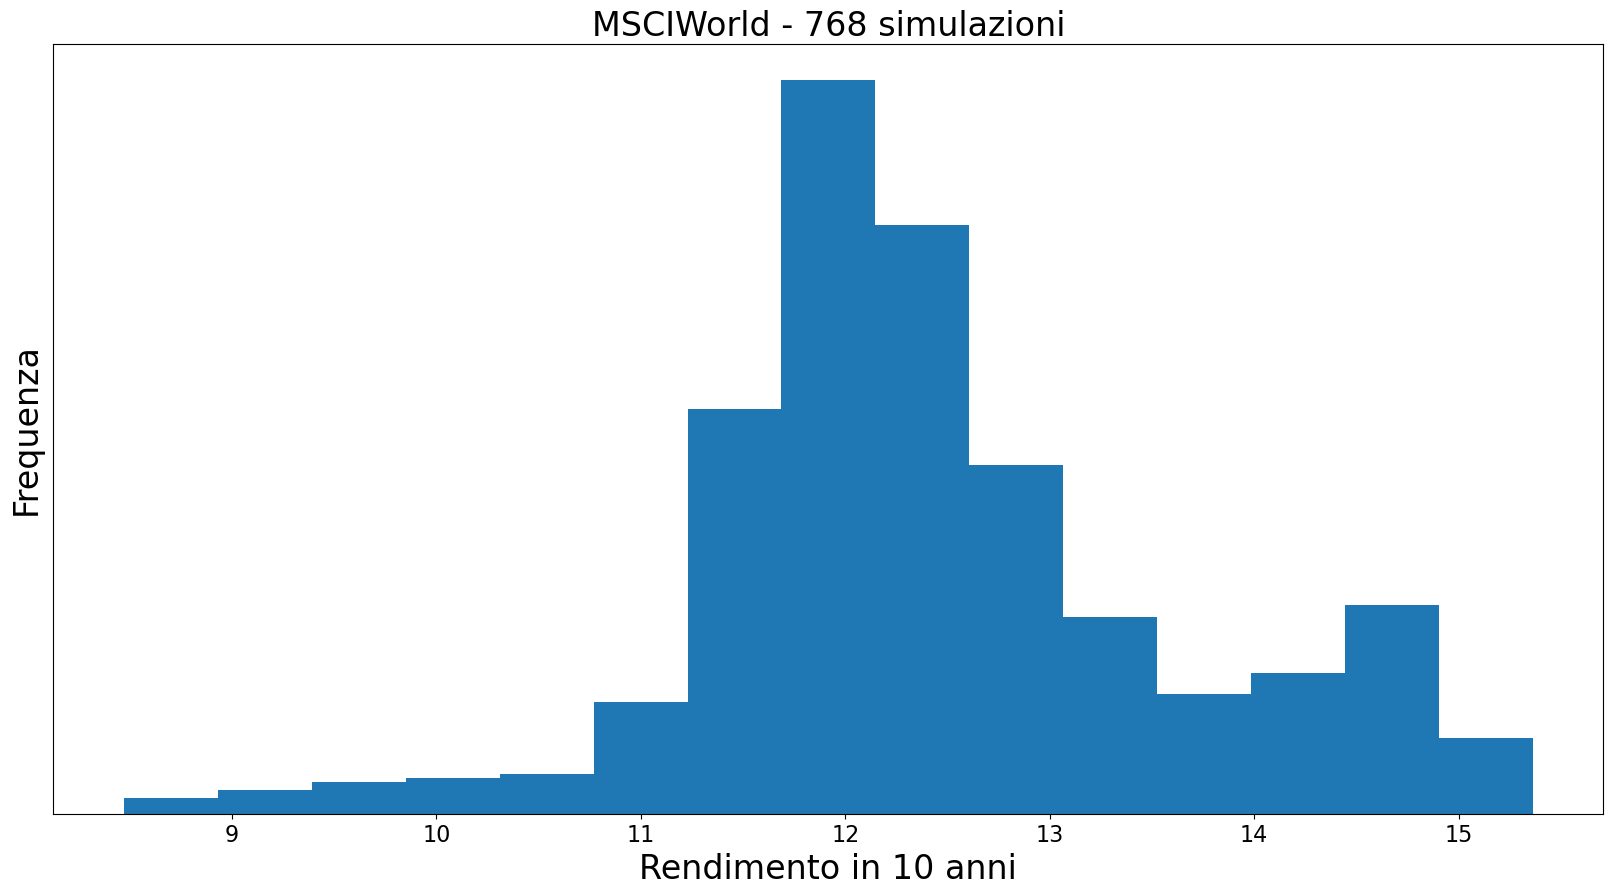

In [10]:
df2=df.copy()
df2["rend"]=df2.variaz/df2.prima
df2["rendA"]=(df2.rend+1.)**(1./anni)-1.
df2["rendA100"]=100*(df2.rendA)
df2.dropna(inplace=True)
print("Rendimento",name[quale],"annuo degli ultimi",anni,"anni", round(df2.rendA100.iloc[-1],1),"%")
print("Rendimento",name[quale],"annuo su",anni,"anni:",end=" ")
print("Min:",round(df2.rendA100.min(),1),"%, Medio:",round(df2.rendA100.mean(),1),"%, Mediano:",\
      round(df2.rendA100.median(),1),"%, Max:",round(df2.rendA100.max(),1),"%")
print("")
plt.title(name[quale]+" - "+str(len(df2))+" simulazioni", fontdict = {'fontsize' : 24})
plt.yticks([])
(df2.rendA100).plot(kind="hist",bins=int(len(df2)/50),figsize=(20,10), fontsize=16)
plt.ylabel("Frequenza",fontdict = {'fontsize' : 24})
plt.xlabel("Rendimento in "+str(anni)+" anni",fontdict = {'fontsize' : 24})

Rendimento MSCIWorld resta sempre negativo sui 10 anni nel 0.0 % di casi

Rendimento MSCIWorld riesce a salire sopra +10% sui 10 anni nel 100.0 % di casi
Rendimento MSCIWorld riesce a salire sopra +20% sui 10 anni nel 100.0 % di casi
Rendimento MSCIWorld riesce a salire sopra +50% sui 10 anni nel 100.0 % di casi
Rendimento MSCIWorld riesce a salire sopra +100% sui 10 anni nel 100.0 % di casi
Rendimento MSCIWorld riesce a salire sopra +200% sui 10 anni nel 92.3 % di casi
Rendimento MSCIWorld riesce a salire sopra +400% sui 10 anni nel 0.0 % di casi


Text(0.5, 0, 'Rendimento MASSIMO 10 anni')

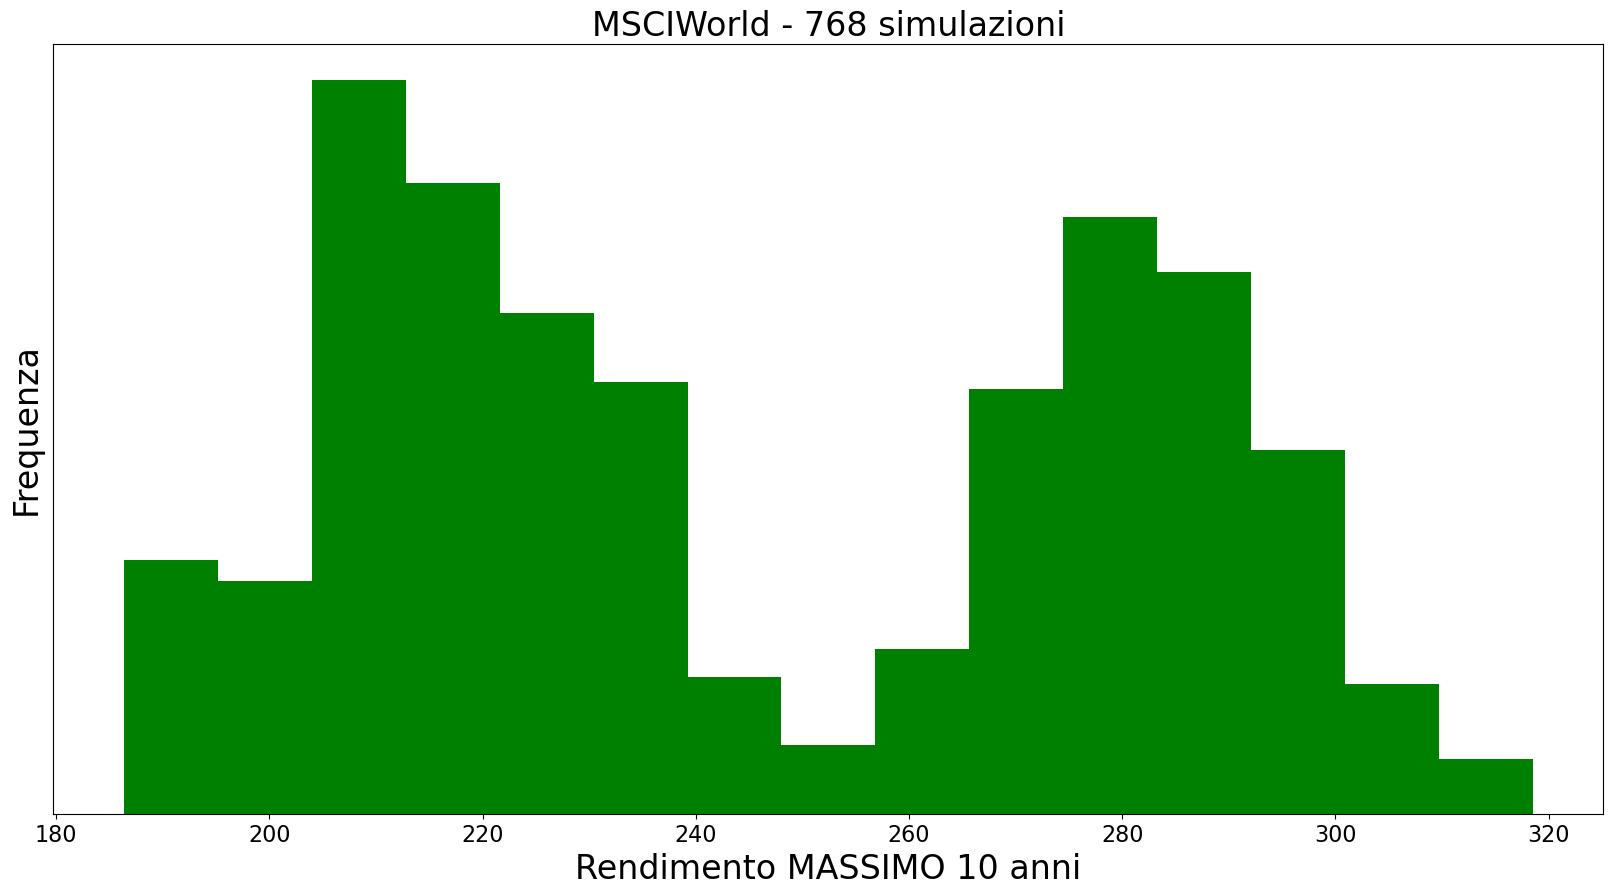

In [11]:
df3=df.copy()
df3["massimo"]=df3.prezzo.rolling(quanto).max()
df3["variaz"]=df3.massimo-df3.prima
df3["rend"]=df3.variaz/df3.prima
df3["rendA"]=(df3.rend+1)**(1/anni)-1
df3["rendA100"]=100*df3.rendA
df3.dropna(inplace=True)
print("Rendimento",name[quale],"resta sempre negativo sui",anni,"anni nel", \
      round(100*(df3.rend<0.01).sum()/len(df3),1) ,"% di casi")
print("")
print("Rendimento",name[quale],"riesce a salire sopra +10% sui",anni,"anni nel", \
      round(100*((df3.rend>0.1).sum()/len(df3)),1) ,"% di casi")
print("Rendimento",name[quale],"riesce a salire sopra +20% sui",anni,"anni nel", \
      round(100*((df3.rend>0.2).sum()/len(df3)),1) ,"% di casi")
print("Rendimento",name[quale],"riesce a salire sopra +50% sui",anni,"anni nel", \
      round(100*((df3.rend>0.5).sum()/len(df3)),1) ,"% di casi")
print("Rendimento",name[quale],"riesce a salire sopra +100% sui",anni,"anni nel", \
      round(100*((df3.rend>1.0).sum()/len(df3)),1) ,"% di casi")
print("Rendimento",name[quale],"riesce a salire sopra +200% sui",anni,"anni nel", \
      round(100*((df3.rend>2.0).sum()/len(df3)),1) ,"% di casi")
print("Rendimento",name[quale],"riesce a salire sopra +400% sui",anni,"anni nel", \
      round(100*((df3.rend>4.0).sum()/len(df3)),1) ,"% di casi")

plt.title(name[quale]+" - "+str(len(df2))+" simulazioni", fontdict = {'fontsize' : 24})
plt.yticks([])
(100*df3.rend).plot(kind="hist",bins=int(len(df3)/50), figsize=(20,10), fontsize=16,color="green")
plt.ylabel("Frequenza",fontdict = {'fontsize' : 24})
plt.xlabel("Rendimento MASSIMO "+str(anni)+" anni",fontdict = {'fontsize' : 24})

In [6]:
df4=df.copy()
df4["rend"]=df4.variaz/df4.prima
df4["rendA"]=(df4.rend+1.)**(1./anni)-1.
df4["rendA100"]=100*(df4.rendA)
df4.to_excel(name[quale]+".xlsx")